In [ ]:
# %%

" ai for source separation of percussions in urban sounds"

' ai for source separation of percussions in urban sounds'

In [ ]:
# %%

import random
import pandas as pd
from config import *
# from model import *
from Last_model import *
from dataset import *
from train import *
from test import *
from utils import *
from torch.utils.data import DataLoader
from torch import optim

# We have 7358 sounds of differents classes (dog bark, drilling, jackhammer, siren, children_playing, engine idling, air conditioner, car horn) with a duration of maximum 4 seconds some are shorter
# 387 files of the percussions class that we want to separate from the others or "hear" better

n_fft = 256
hop_length = n_fft // 4

In [ ]:
# %%

# Load metadata
metadata = pd.read_csv(os.path.join(
    DATASET_MIX_AUDIO_PATH, "metadata.csv"))

# define the train, validation and test sets

dataset = MixtureDataset(metadata_file=metadata, k=0.8,
                         noise_class='engine_idling')
# Split the dataset into training, validation and test sets
train_size = int(0.8 * len(dataset))
val_size = int(0.1 * len(dataset))
test_size = len(dataset) - train_size - val_size
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(
    dataset, [train_size, val_size, test_size])

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)

Epoch 1/5, Average validation Loss: 1.5969: 100%|██████████| 13/13 [00:02<00:00,  5.84it/s]


Epoch 1/5, Training Loss: 1.7809, Validation Loss: 1.5969, Time: 32.63s


Epoch 2/5, Average validation Loss: 1.5396: 100%|██████████| 13/13 [00:02<00:00,  6.12it/s]


Epoch 2/5, Training Loss: 1.5674, Validation Loss: 1.5396, Time: 26.16s


Epoch 3/5, Average validation Loss: 1.4767: 100%|██████████| 13/13 [00:02<00:00,  6.17it/s]


Epoch 3/5, Training Loss: 1.5061, Validation Loss: 1.4767, Time: 26.51s


Epoch 4/5, Average validation Loss: 1.4467: 100%|██████████| 13/13 [00:02<00:00,  6.05it/s]


Epoch 4/5, Training Loss: 1.4254, Validation Loss: 1.4467, Time: 26.94s


Epoch 5/5, Average validation Loss: 1.3436: 100%|██████████| 13/13 [00:02<00:00,  6.03it/s]

Epoch 5/5, Training Loss: 1.3753, Validation Loss: 1.3436, Time: 26.75s


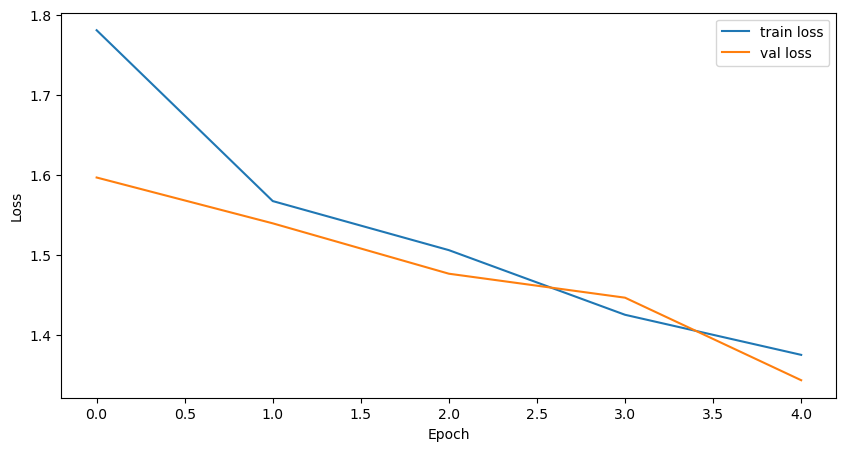

In [ ]:
# %%

# Define the model, optimizer and loss function
model = ResUNet(in_channels=2, out_channels=16)
# optimizer = optim.Adam(model.parameters(), lr=0.001, eps=1e-6, amsgrad=True)
optimizer = optim.SGD(model.parameters(), lr=0.001,
                      momentum=0.9)

# Train the model
train_losses, val_losses, SDRi_list, SISDR_list = train(model, train_loader, val_loader,
                                                        num_epochs=5, optimizer=optimizer, criterion=loss_function, device="cuda")

# Plot the training and validation losses
plot_loss(train_losses, val_losses)

In [ ]:
df

,mix name,percussion name,noise name,predicted name,fold,noise_class
0,data_2024_02_20-14_26_36.wav_102857-5-0-9.wav,data_2024_02_20-14_26_36,102857-5-0-9.wav,data_2024_02_20-14_26_36_mix_102857-5-0-9_pred...,10,engine_idling
1,data_2024_03_13-15_12_07.wav_113201-5-0-0.wav,data_2024_03_13-15_12_07,113201-5-0-0.wav,data_2024_03_13-15_12_07_mix_113201-5-0-0_pred...,2,engine_idling
2,data_2024_02_14-15_06_20.wav_39847-5-0-10.wav,data_2024_02_14-15_06_20,39847-5-0-10.wav,data_2024_02_14-15_06_20_mix_39847-5-0-10_pred...,10,engine_idling
3,hps_2024_02_21-09_16_24.wav_168846-5-1-13.wav,hps_2024_02_21-09_16_24,168846-5-1-13.wav,hps_2024_02_21-09_16_24_mix_168846-5-1-13_pred...,7,engine_idling
4,data_2024_02_15-08_41_15.wav_17853-5-0-11.wav,data_2024_02_15-08_41_15,17853-5-0-11.wav,data_2024_02_15-08_41_15_mix_17853-5-0-11_pred...,3,engine_idling
...,...,...,...,...,...,...
189,data_2024_03_13-11_10_11.wav_106487-5-0-1.wav,data_2024_03_13-11_10_11,106487-5-0-1.wav,data_2024_03_13-11_10_11_mix_17578-5-0-22_pred...,5,engine_idling
190,hps_2024_02_28-08_27_14.wav_144068-5-3-0.wav,hps_2024_02_28-08_27_14,144068-5-3-0.wav,hps_2024_02_28-08_27_14_mix_144068-5-3-0_predi...,3,engine_idling
191,hps_2024_02_28-08_35_31.wav_176787-5-0-23.wav,hps_2024_02_28-08_35_31,176787-5-0-23.wav,hps_2024_02_28-08_35_31_mix_176787-5-0-23_pred...,1,engine_idling
192,hps_2024_03_05-15_39_33.wav_154758-5-0-13.wav,hps_2024_03_05-15_39_33,154758-5-0-13.wav,hps_2024_03_05-15_39_33_mix_154758-5-0-13_pred...,4,engine_idling
